# Case Scenario

You are a junior data analyst working on the marketing analyst team at StayHealthy, a high-tech manufacturer of health-focused products for women. StayHealthy is a successful small company, but they have the potential to become a larger player in the global smart device market. Mr.Modi, cofounder and Chief Creative Officer of StayHealthy, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

You have been asked to focus on one of StayHealthy’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company.

You will present your analysis to the StayHealthy executive team along with your high-level recommendations for StayHealthy’s marketing strategy.

Questions to be answered (hopefully)

* what are some trends in smart device usage?
* how could these trends apply to Bellabeat customers?
* how could these trends help influence Bellabeat marketing strategies?
* Business task - The goal is would be to figure out potential opportunities for growth and recommandations to present to the client, all this based on trends in smart device use.

# Lets see my Approach

First things first, load some packages

In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 

%matplotlib inline
warnings.filterwarnings("ignore")

Then we'll import our datasets. I'll use the StayHealthy Data Set I had a look at some CSV beforehand on Googlesheets. I noticed that there was a problem with the timestamps, being MMDDYYYY and me being Indian, I decided to change it in all datasets to DDMMYYYY in order to avoid confusion and I divided the dates and time in different columns named DATE and TIME. I decide to go first with dailyActivity_merged.csv, sleepDay_merged.csv, hourlyCalories_merged.csv, hourlyIntensities_merged.csv and weightLogInfo_merged.csv.

The reason why I chose these is because they are the main reasons why people get smart device to track their progress. However what we need to do now is to rename the datasets



### Reading all the Data from sources here source is csv file

In [2]:
daily_activity=pd.read_csv("dailyActivity_merged.csv")
sleep_day=pd.read_csv("sleepDay_merged.csv")
weight=pd.read_csv("weightLogInfo_merged.csv")
hourly_cal=pd.read_csv("hourlyCalories_merged.csv")
hourly_int=pd.read_csv("hourlyIntensities_merged.csv")

In [3]:
# Hourly Intensities
hourly_int['ActivityHour'] = pd.to_datetime(hourly_int['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p").dt.tz_localize('UTC')
hourly_int['time'] = hourly_int['ActivityHour'].dt.strftime('%H:%M:%S')
hourly_int['date'] = hourly_int['ActivityHour'].dt.strftime('%m/%d/%y')
hourly_int

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
0,1503960366,2016-04-12 00:00:00+00:00,20,0.333333,00:00:00,04/12/16
1,1503960366,2016-04-12 01:00:00+00:00,8,0.133333,01:00:00,04/12/16
2,1503960366,2016-04-12 02:00:00+00:00,7,0.116667,02:00:00,04/12/16
3,1503960366,2016-04-12 03:00:00+00:00,0,0.000000,03:00:00,04/12/16
4,1503960366,2016-04-12 04:00:00+00:00,0,0.000000,04:00:00,04/12/16
...,...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00+00:00,12,0.200000,10:00:00,05/12/16
22095,8877689391,2016-05-12 11:00:00+00:00,29,0.483333,11:00:00,05/12/16
22096,8877689391,2016-05-12 12:00:00+00:00,93,1.550000,12:00:00,05/12/16
22097,8877689391,2016-05-12 13:00:00+00:00,6,0.100000,13:00:00,05/12/16


In [4]:
# Hourly Calories
hourly_cal['ActivityHour'] = pd.to_datetime(hourly_cal['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p").dt.tz_localize('UTC')

# Extract time and date from 'ActivityHour'
hourly_cal['time'] = hourly_cal['ActivityHour'].dt.strftime('%H:%M:%S')
hourly_cal['date'] = hourly_cal['ActivityHour'].dt.strftime('%m/%d/%y')
hourly_cal

,Id,ActivityHour,Calories,time,date
0,1503960366,2016-04-12 00:00:00+00:00,81,00:00:00,04/12/16
1,1503960366,2016-04-12 01:00:00+00:00,61,01:00:00,04/12/16
2,1503960366,2016-04-12 02:00:00+00:00,59,02:00:00,04/12/16
3,1503960366,2016-04-12 03:00:00+00:00,47,03:00:00,04/12/16
4,1503960366,2016-04-12 04:00:00+00:00,48,04:00:00,04/12/16
...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00+00:00,126,10:00:00,05/12/16
22095,8877689391,2016-05-12 11:00:00+00:00,192,11:00:00,05/12/16
22096,8877689391,2016-05-12 12:00:00+00:00,321,12:00:00,05/12/16
22097,8877689391,2016-05-12 13:00:00+00:00,101,13:00:00,05/12/16


In [5]:
# Daily Activity
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format="%m/%d/%Y").dt.tz_localize('UTC')

# Extract date from 'ActivityDate'
daily_activity['date'] = daily_activity['ActivityDate'].dt.strftime('%m/%d/%y')
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
0,1503960366,2016-04-12 00:00:00+00:00,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,04/12/16
1,1503960366,2016-04-13 00:00:00+00:00,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,04/13/16
2,1503960366,2016-04-14 00:00:00+00:00,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,04/14/16
3,1503960366,2016-04-15 00:00:00+00:00,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,04/15/16
4,1503960366,2016-04-16 00:00:00+00:00,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,04/16/16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08 00:00:00+00:00,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,05/08/16
936,8877689391,2016-05-09 00:00:00+00:00,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,05/09/16
937,8877689391,2016-05-10 00:00:00+00:00,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,05/10/16
938,8877689391,2016-05-11 00:00:00+00:00,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,05/11/16


In [6]:
# Sleep Day
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'], format="%m/%d/%Y %I:%M:%S %p").dt.tz_localize('UTC')

# Extract date from 'SleepDay'
sleep_day['date'] = sleep_day['SleepDay'].dt.strftime('%m/%d/%y')
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
0,1503960366,2016-04-12 00:00:00+00:00,1,327,346,04/12/16
1,1503960366,2016-04-13 00:00:00+00:00,2,384,407,04/13/16
2,1503960366,2016-04-15 00:00:00+00:00,1,412,442,04/15/16
3,1503960366,2016-04-16 00:00:00+00:00,2,340,367,04/16/16
4,1503960366,2016-04-17 00:00:00+00:00,1,700,712,04/17/16
...,...,...,...,...,...,...
408,8792009665,2016-04-30 00:00:00+00:00,1,343,360,04/30/16
409,8792009665,2016-05-01 00:00:00+00:00,1,503,527,05/01/16
410,8792009665,2016-05-02 00:00:00+00:00,1,415,423,05/02/16
411,8792009665,2016-05-03 00:00:00+00:00,1,516,545,05/03/16


Now we can start exploring the data like  Christopher Columbus. Let's run some stats



In [7]:
distinct_daily_activity = daily_activity['Id'].nunique()
distinct_hourly_cal = hourly_cal['Id'].nunique()
distinct_hourly_int = hourly_int['Id'].nunique()
distinct_sleep_day = sleep_day['Id'].nunique()
distinct_weight = weight['Id'].nunique()

print("Distinct Ids in daily_activity:", distinct_daily_activity)
print("Distinct Ids in hourly_cal:", distinct_hourly_cal)
print("Distinct Ids in hourly_int:", distinct_hourly_int)
print("Distinct Ids in sleep_day:", distinct_sleep_day)
print("Distinct Ids in weight:", distinct_weight)

Distinct Ids in daily_activity: 33
Distinct Ids in hourly_cal: 33
Distinct Ids in hourly_int: 33
Distinct Ids in sleep_day: 24
Distinct Ids in weight: 8


That gives us the total number of participants for each sets daily_activity 33, hourly_cal 33, hourly_int 33, sleep_day 24, weight 8. it goes without saying that 8 participants is not a proper sample size.

In [8]:

# Summary statistics for selected columns in daily_activity
summary_daily_activity = daily_activity[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()
print("Summary for daily_activity:")
print(summary_daily_activity)

# Summary statistics for active minutes in each category in daily_activity
summary_active_minutes = daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].describe()
print("\nSummary for active minutes in daily_activity:")
print(summary_active_minutes)

# Summary statistics for calories in hourly_cal
summary_hourly_cal = hourly_cal[['Calories']].describe()
print("\nSummary for hourly_cal:")
print(summary_hourly_cal)

# Summary statistics for sleep in sleep_day
summary_sleep_day = sleep_day[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe()
print("\nSummary for sleep_day:")
print(summary_sleep_day)

# Summary statistics for weight in weight
summary_weight = weight[['WeightKg', 'BMI']].describe()
print("\nSummary for weight:")
print(summary_weight)

Summary for daily_activity:
         TotalSteps  TotalDistance  SedentaryMinutes     Calories
count    940.000000     940.000000        940.000000   940.000000
mean    7637.910638       5.489702        991.210638  2303.609574
std     5087.150742       3.924606        301.267437   718.166862
min        0.000000       0.000000          0.000000     0.000000
25%     3789.750000       2.620000        729.750000  1828.500000
50%     7405.500000       5.245000       1057.500000  2134.000000
75%    10727.000000       7.712500       1229.500000  2793.250000
max    36019.000000      28.030001       1440.000000  4900.000000

Summary for active minutes in daily_activity:
       VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes
count         940.000000           940.000000            940.000000
mean           21.164894            13.564894            192.812766
std            32.844803            19.987404            109.174700
min             0.000000             0.000000              

what do all this tell us?
1. the average sedentary time is of 16 hours (mean SedentaryMinutes: 991.2), in a day made of 24 hours, if you take out the sleeping time...that clearly is too much
2. moreover, the majority of participants are lightly active
3. on average,people sleep in one go for 7 hours (mean TotalMinutesAsleep: 419.5)
4. average steps per day are 7638. Which is not a lot considering the fact that the CDC and the WHO tell to go for 10 000 (if you do not have a physical activity, in which case you could go for lower step count)
5. finally, the average BMI is of 25.19 which is at the very startof the OVERWEIGHT status.

now I think I'm pretty much set to start merging. So I'll merge two data sets: daily_activity and sleep_day on columns ID and DATE

In [9]:
merged_data = pd.merge(sleep_day, daily_activity, on=['Id', 'date'])
merged_data.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'date', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

awesome stuff ! let's start with the visualization directly in Python

<Figure size 1200x600 with 0 Axes>

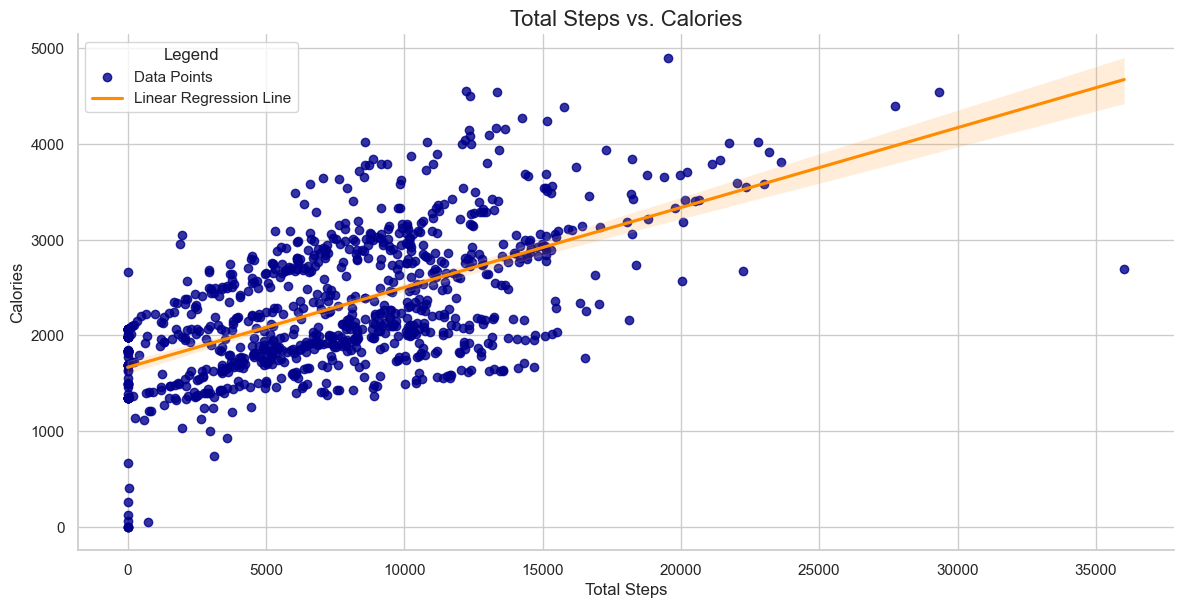

In [10]:

# Set a Seaborn style
sns.set(style="whitegrid")

# Scatter plot with a linear regression line
plt.figure(figsize=(12, 6))
scatterplot = sns.lmplot(x='TotalSteps', y='Calories', data=daily_activity, aspect=2, height=6, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'darkorange'})

# Beautify the plot
plt.title("Total Steps vs. Calories", fontsize=16)
plt.xlabel("Total Steps", fontsize=12)
plt.ylabel("Calories", fontsize=12)

# Customize the legend using plt.legend()
plt.legend(title='Legend', labels=['Data Points', 'Linear Regression Line'])

# Show the plot
plt.show()

Here we can see something quite obvious: the more we walk, the more calories we burn

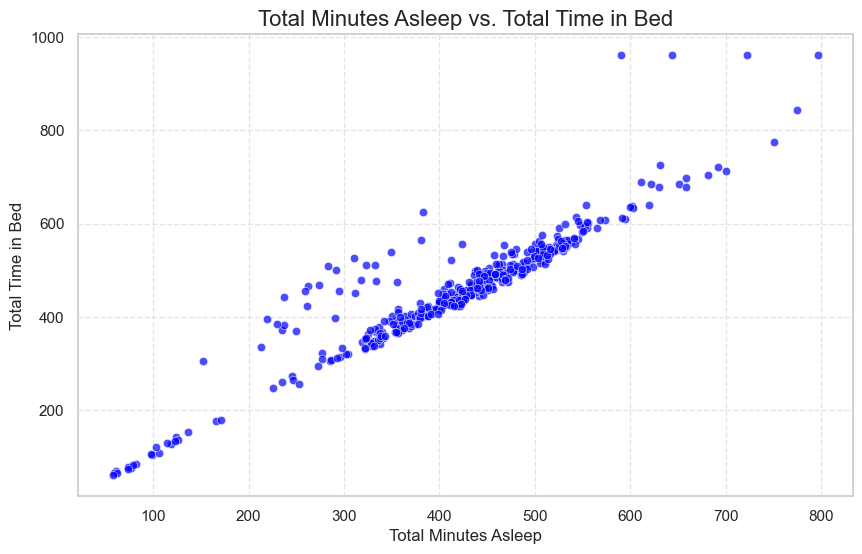

In [11]:

# Set a Seaborn style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x='TotalMinutesAsleep', y='TotalTimeInBed', data=sleep_day, color='blue', alpha=0.7)

# Beautify the plot
plt.title("Total Minutes Asleep vs. Total Time in Bed", fontsize=16)
plt.xlabel("Total Minutes Asleep", fontsize=12)
plt.ylabel("Total Time in Bed", fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

we can see how linear the relationship is. One recommendation would be to add a "go to sleep" notification to the smart device. That would improve the overall experience (that's coming from an insomniac) now let's look at the other data sets.

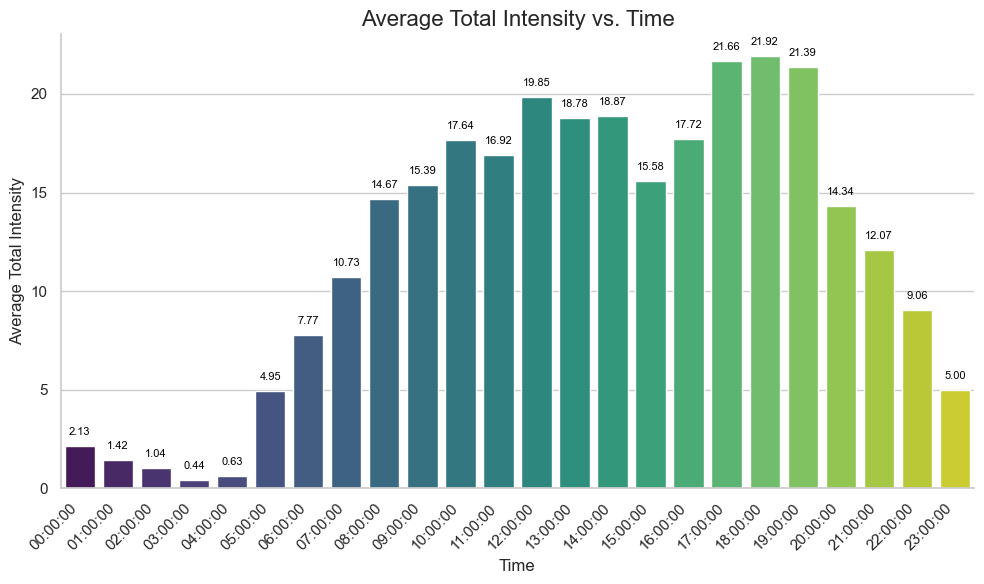

In [12]:
# Group by 'time' and calculate the mean of 'TotalIntensity'
new_hourly_int = hourly_int.groupby('time')['TotalIntensity'].mean().reset_index()

# Set a Seaborn style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='time', y='TotalIntensity', data=new_hourly_int, palette='viridis')

# Beautify the plot
barplot.set(xlabel='Time', ylabel='Average Total Intensity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Average Total Intensity vs. Time", fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove the top and right spines for cleaner aesthetics

# Display values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

# Show the plot
plt.show()

We can see that people are in general the most active around noon and between 5PM and 8PM. that must be because people go out of their office for their lunch break, and sometimes go to a gym after work or even go for a run.

So notifications to remind to do some exercise could be used to improve the experience

Finally, being an insomniac myself, I want to see if there is a relation between sedentry and sleep.

<Figure size 1000x600 with 0 Axes>

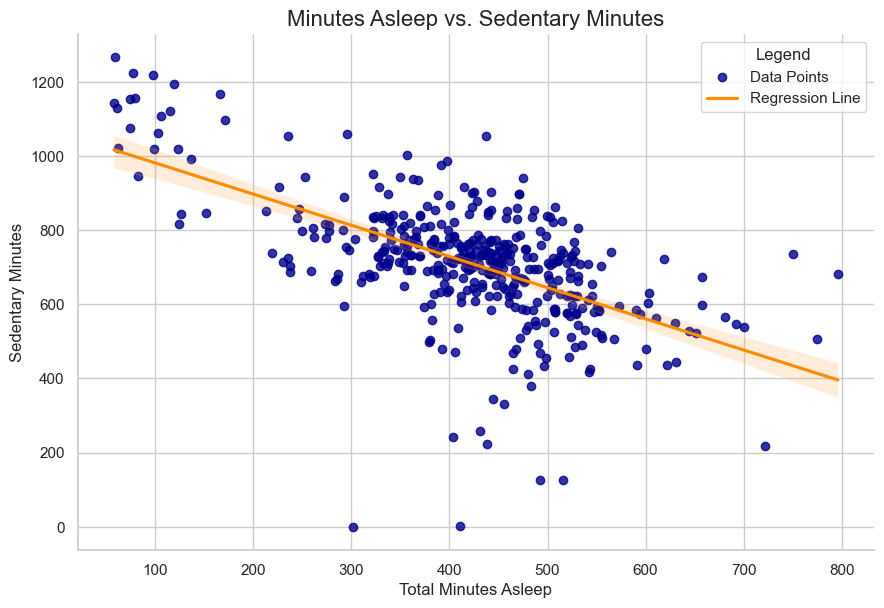

In [13]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Scatter plot with a smooth line
plt.figure(figsize=(10, 6))
scatterplot = sns.lmplot(x='TotalMinutesAsleep', y='SedentaryMinutes', data=merged_data, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'darkorange'}, height=6, aspect=1.5)

# Beautify the plot
plt.title("Minutes Asleep vs. Sedentary Minutes", fontsize=16)
plt.xlabel("Total Minutes Asleep", fontsize=12)
plt.ylabel("Sedentary Minutes", fontsize=12)

# Customize the legend using plt.legend()
plt.legend(title='Legend', labels=['Data Points', 'Regression Line'])

# Show the plot
plt.show()

Here we can clearly see a relationship: the less sedentary we are, the more we sleep. That can be linked to the fact that we spend energy and that exhausts the body. The reverse process is also valid, the more we sleep, the less sedentary we are, because we are rested and have high energy levels and motivation to move. So another way Bellabeat could improve their service is by reminding the customer with a notification to go to sleep or to offer a service like a white noise to help sleep

CAREFUL ! of course as a reminder, correlation doesn't mean causation so in order to validate our hypothesis on the different relationships, we would need to look in more data. 

# Conclusion


after analyzing the data, I found some data that would help StayHealthy with their marketing strategy
1. their target audience have an office job, meaning that they spend an awful lot of time sitting down but are indeed active at lunchtime and after 5PM
2. their customers do some light activity

To sum up the recommendations for the app

1. add a notification to remind the user to reach a step goal, 10000 steps if no physical activity is done, 7000 is a good average even if the WHO and CDC say that 5000 is the absolute minimum
2. in order to lose weight, you need to be in calorie deficit, so the app can track the macros like myfitnesspal and give an alert as soon as a goal is reached whether it be protein, carbs or fat
3. add a notification for the user to go to sleep
4. the app could also give an alert after work around 5PM to motivate the user to go to the gym and not give in to the lack of motivation
5. in order to improve the user's sleep, the app could also provide a white noise service in order to help with the sleeping process. Sounds that could be included: warp, rain, zen music